In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
original_df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
original_test_df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")

Criando uma copia dos dados originais

In [3]:
df = original_df.copy()
df_test = original_test_df.copy()

In [ ]:
#Analisando as linhas do dataset.
df.head()


Verificando se existem dados ausentes.

In [ ]:
df.info()

Analisando as estatísticas descritivas dos dados. 
As estatísitcas nos informar como esta a distribuição dos nossos dados, podem indicar a presença de outliers, e verificar a assimetria dos dados.

In [ ]:
df.describe()

Verificamos que a feature "rotational_speed_rpm" possui um desvio padrao alto, e no histograma verificamos que ela ela possui uma acentuação para a direita.

In [4]:
df1 = df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min', 'failure_type']]

In [ ]:
#Grafico de pares.
sns.pairplot(df1, hue='failure_type')

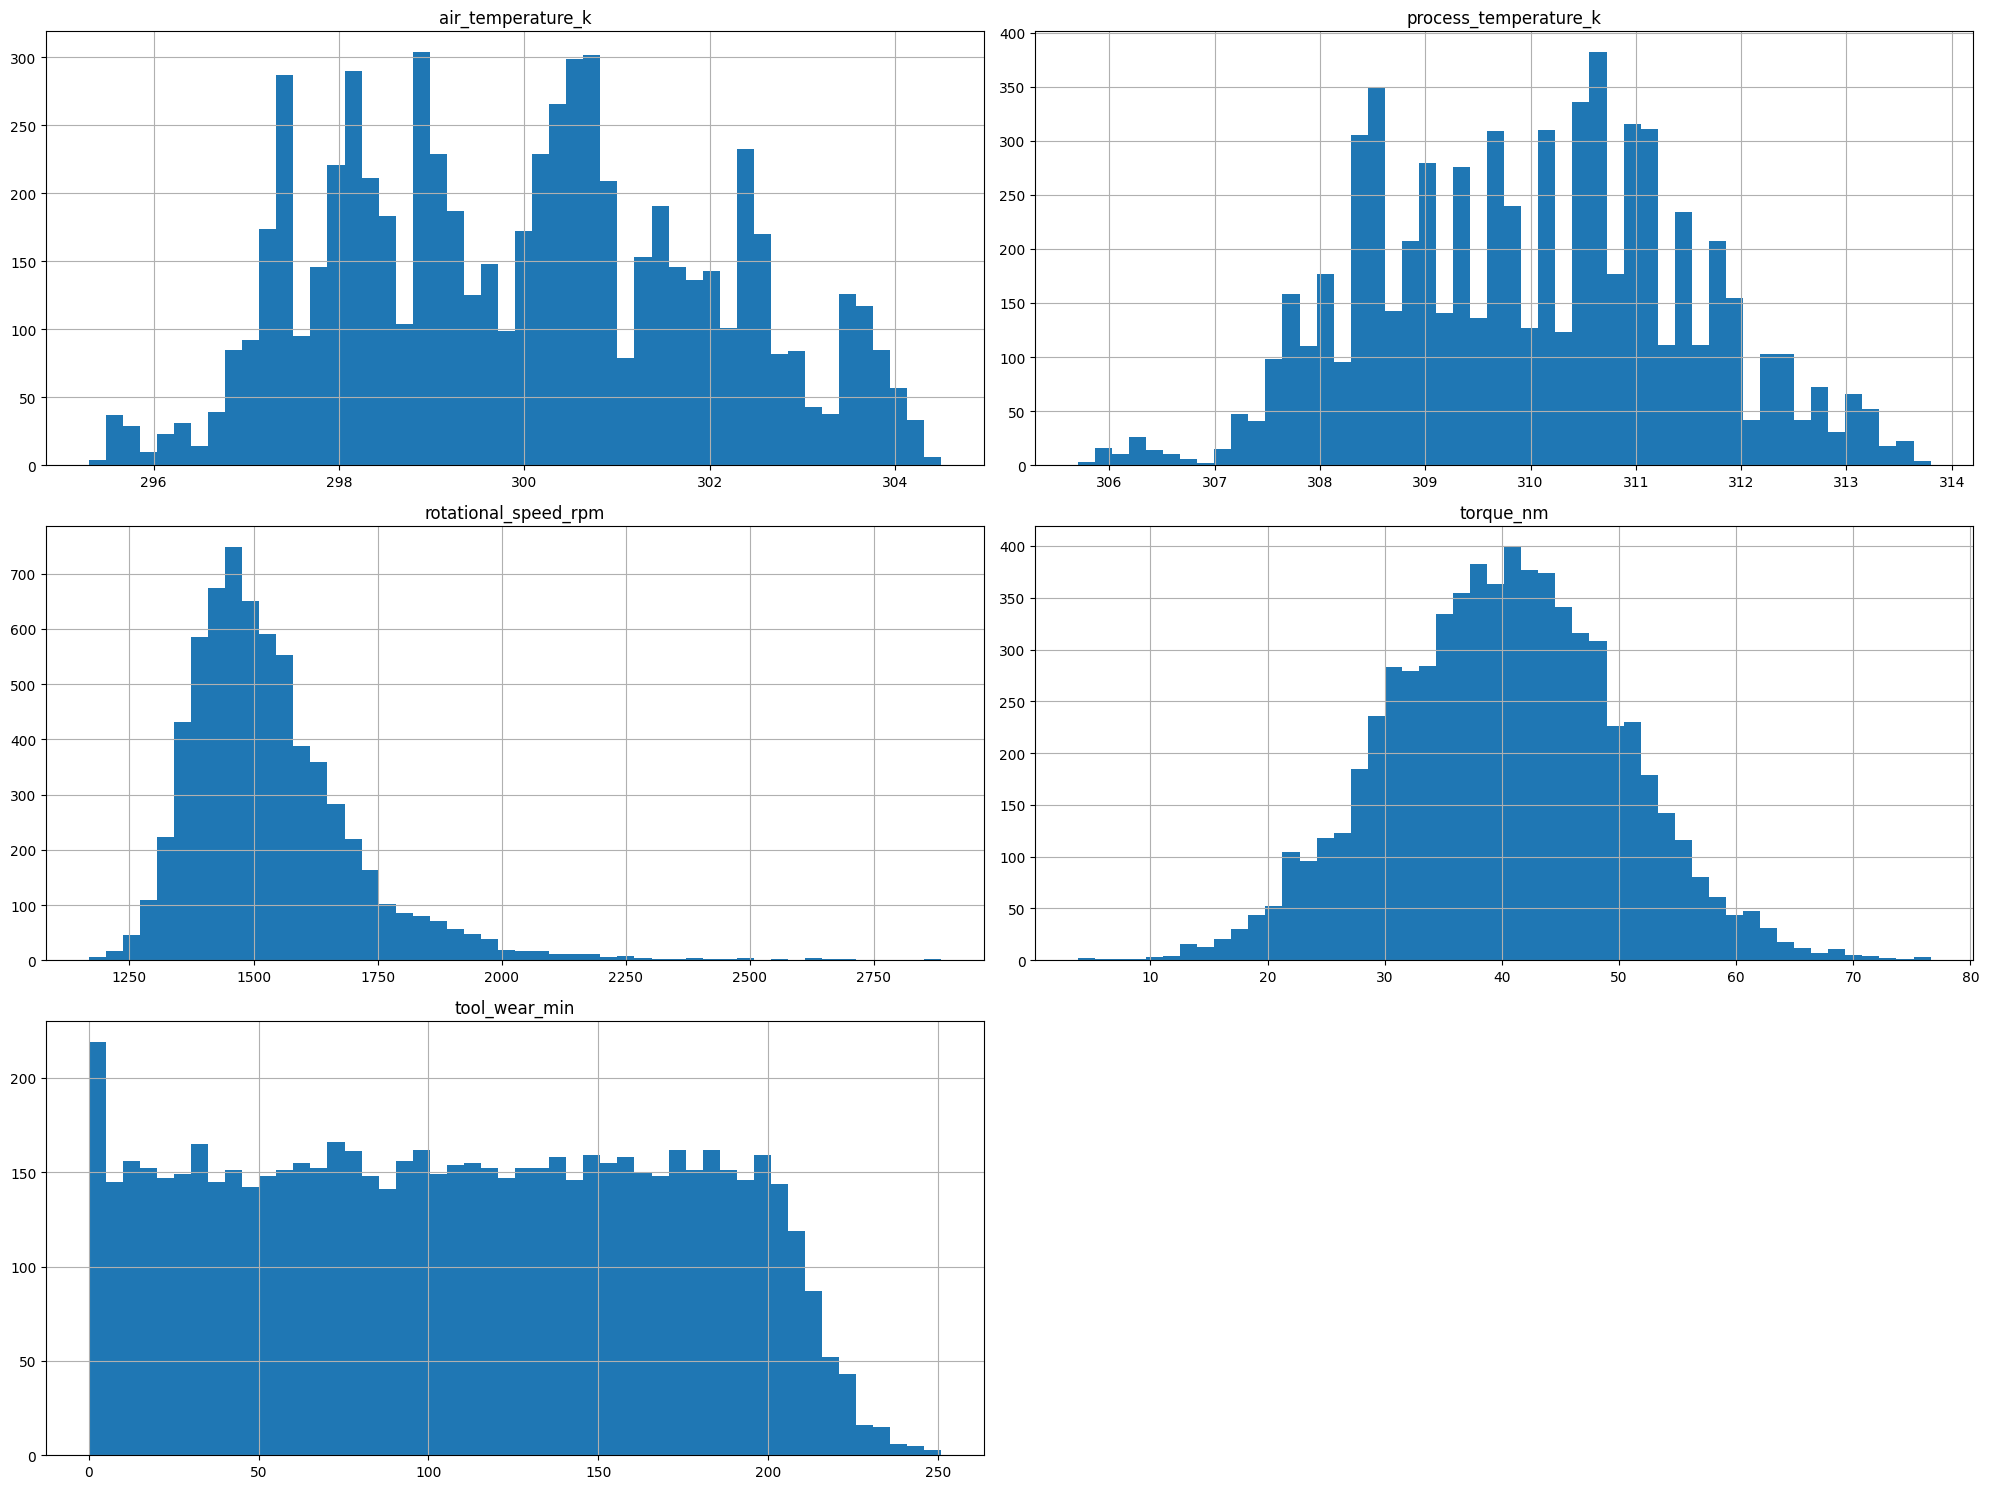

In [13]:
#Histograma de todas as features que iremos usar.
df1.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [5]:
X = df1[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
y = df1['failure_type']

In [6]:
# Dividir os dados em treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinando o modelo de Árvore de Decisão.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as previsões no conjunto de teste.
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo.
score = model.score(X_test, y_test)
print("Acurácia:", score)

Acurácia: 0.9640179910044977


In [21]:
#Verificando a features importantes.
importance = model.feature_importances_

# Criando um dataframe com as informações.
data = {'feature': X.columns, 'importance': importance}
df = pd.DataFrame(data)
df = df.sort_values(by='importance', ascending=False)
df

,feature,importance
3,torque_nm,0.376320
1,process_temperature_k,0.210132
0,air_temperature_k,0.170588
4,tool_wear_min,0.122674
2,rotational_speed_rpm,0.120285


In [8]:
#Metricas importantes

# precision.
print(precision_score(y_test, y_pred, average='weighted'))
#recall.
print(recall_score(y_test, y_pred, average='weighted'))
#f1_score.
print(f1_score(y_test, y_pred, average='weighted'))


0.9666536558156169
0.9640179910044977
0.9650797128908073


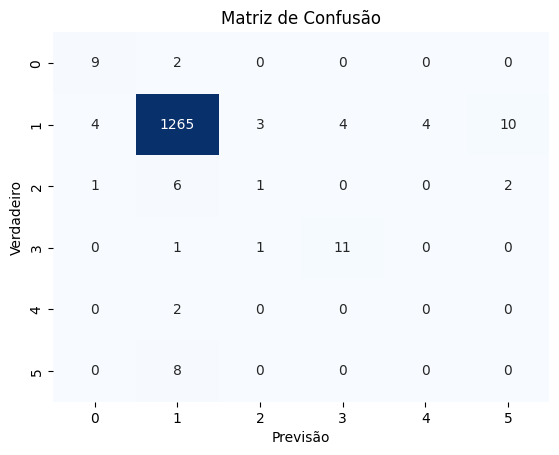

In [23]:
# Calculando a matriz de confusão.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão usando o seaborn.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [25]:
x_predict = df_test[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
y_pred2  = model.predict(x_predict)